# Image Detection Project - Finding Strawberries


In [21]:
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [22]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [23]:
image = cv2.imread('strawberries.jpeg')

In [24]:
image.shape

(1414, 2121, 3)

In [25]:
# image

In [26]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

b             g             r
count  2.999094e+06  2.999094e+06  2.999094e+06
mean   6.069855e+01  1.034428e+02  1.101182e+02
std    3.247718e+01  4.324488e+01  4.382350e+01
min    0.000000e+00  0.000000e+00  8.000000e+00
25%    3.600000e+01  7.400000e+01  8.400000e+01
50%    5.900000e+01  1.080000e+02  1.080000e+02
75%    8.300000e+01  1.380000e+02  1.310000e+02
max    2.550000e+02  2.550000e+02  2.550000e+02

In [27]:
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)

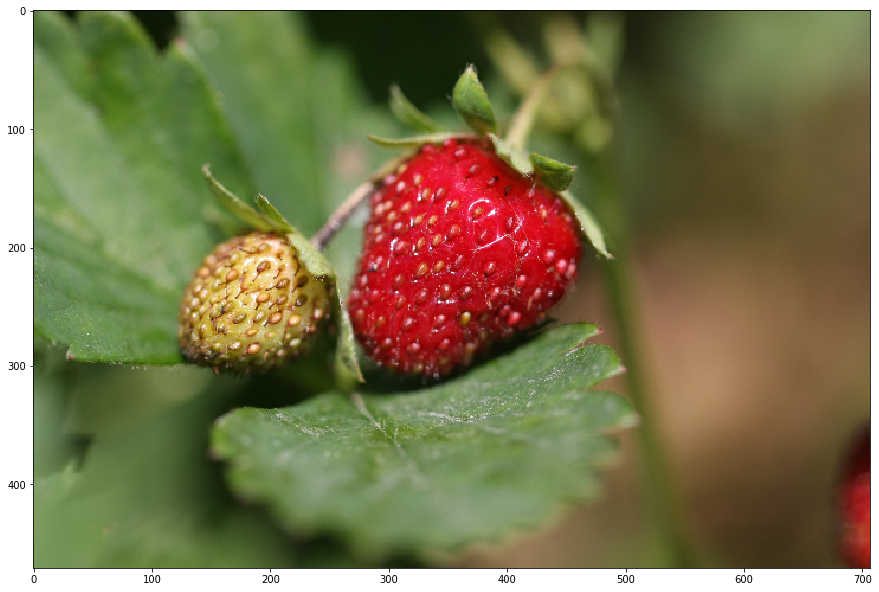

In [28]:
show(image)

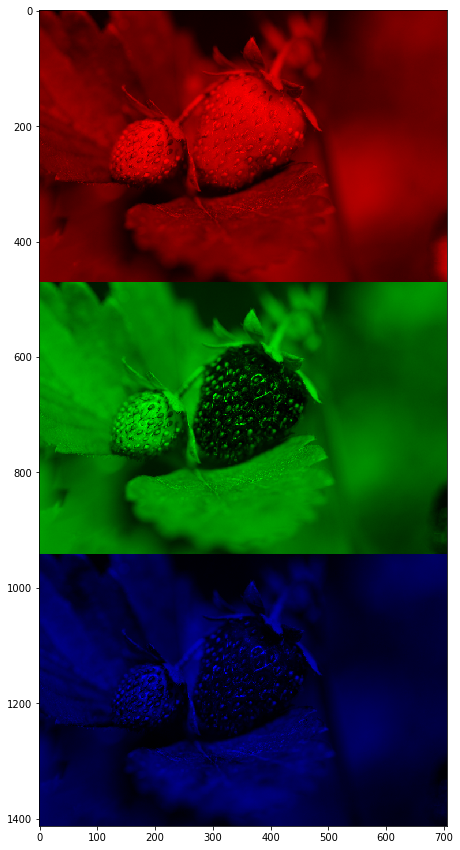

In [29]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

<class 'numpy.ndarray'>
[[[ 93 122  68]
  [ 95 124  70]
  [ 99 128  74]
  ...
  [123 141  93]
  [125 143  95]
  [123 141  93]]

 [[ 86 116  62]
  [ 89 120  63]
  [ 92 123  66]
  ...
  [127 143  96]
  [124 142  94]
  [123 139  92]]

 [[ 84 114  60]
  [ 86 117  60]
  [ 90 119  63]
  ...
  [124 142  94]
  [126 142  95]
  [123 139  92]]

 ...

 [[120 150  90]
  [120 149  91]
  [121 150  92]
  ...
  [126  25  13]
  [128  26  14]
  [133  25  15]]

 [[121 149  90]
  [122 150  92]
  [119 147  89]
  ...
  [122  25  16]
  [127  26  16]
  [130  26  17]]

 [[121 149  90]
  [123 151  93]
  [121 149  91]
  ...
  [117  23  13]
  [121  25  13]
  [125  27  18]]]


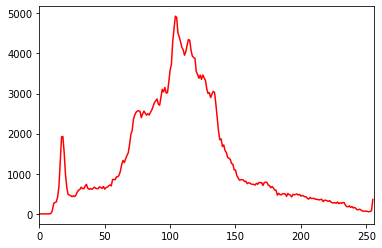

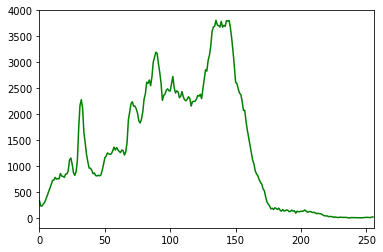

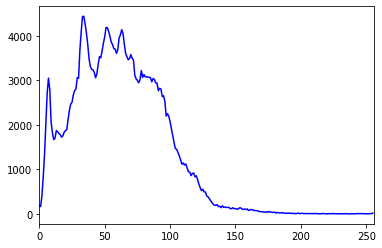

In [30]:
def show_rgb_hist(image):
    colors = ('r','g','b')
    """for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
#         plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        print(histr)
        plt.bar([1,2,3,4,5, 6], (1, 2, 3, 4, 5, 6))
        #plt.bar(range(0, 5), histr,  color=colours, edgecolor=colours, width=1)
#         plt.xlim([0, 256])

        plt.show()"""
    print(image)
    #image = cv2.imread("strawberry.jpg")
    for i,col in enumerate(colors):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr, color = col)
        plt.xlim([0,256])
        plt.show()
#show(image)
print((type(image)))
show_rgb_hist(image)

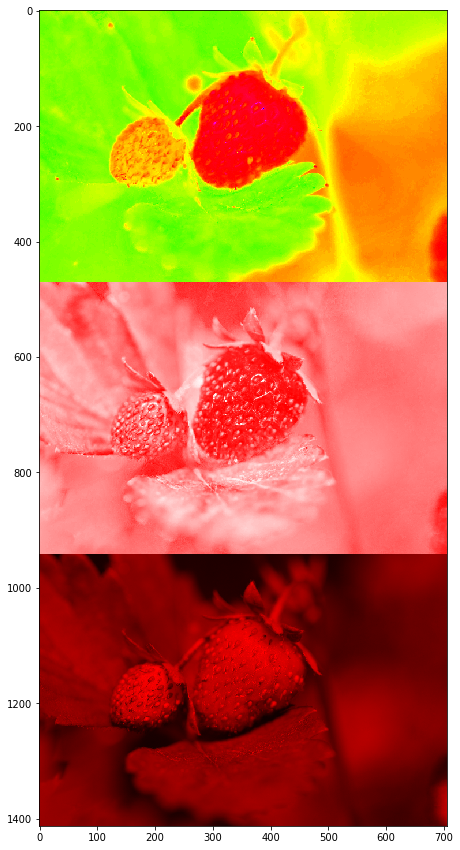

In [31]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

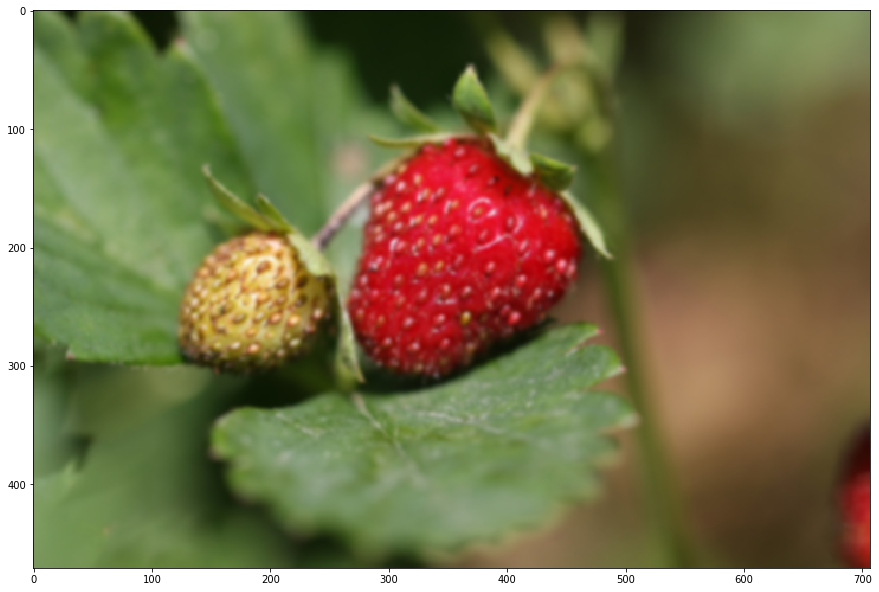

In [32]:
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJoAAADNCAYAAADwrRraAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAb50lEQVR4nO3dfbRddX3n8fcHgiDYDqENa0YlQAoLCAu1mhmZYhXSKuA4YTpYn6rFqoB1VJyODzAotYiK4iBD0UKojgzQykDpgC6ryJNWFtQGKwzBB2ITQEeHIOH5QSjf+WPvuzg9nOTuJDu55577fq211773t3+/c35nfW9uzv2cvX87VYUkSZIkSZK0ubaZ6QlIkiRJkiRpMhg0SZIkSZIkqRcGTZIkSZIkSeqFQZMkSZIkSZJ6YdAkSZIkSZKkXhg0SZIkSZIkqRedgqYkz03yp0muT/JwkkqyR8ex2yQ5IcmaJI8muSnJkZs1a0mSJEmSJI2drmc07QW8BlgH/O1GPsdHgA8DZwGHAzcAFyd55UY+jiRJkiRJksZYqmr6Tsk2VfVk+/XbgHOBPatqzTTjdgXuBE6tqj8eaL8KWFBVz9uMuUuSJEmSJGmMdDqjaSpk2gSHAs8ALhhqvwA4IMmem/i4kiRJkiRJGjNbejHw/YHHgFVD7Svb/eIt/PySJEmSJEnaSrZ00LQLcG89/fq8ewaOS5IkSZIkaQLMm+kJjJLkGOAYgJ122ulF++677wzPSJIkSZIkaXLceOONd1fVgr4fd0sHTeuAnZNk6KymqTOZ7hkxhqpaDiwHWLJkSa1YsWLLzlKSJEmSJGkOSXL7lnjcLX3p3Epge+DXhtqn1ma6dQs/vyRJkiRJkraSLR00fRV4HPi9ofY3ArdU1eot/PySJEmSJEnaSjpfOpfk1e2XL2r3hydZC6ytqm+0fZ4AzquqtwJU1V1JTgdOSPIA8B3gtcBSYFlPr0GSJEmSJEljYGPWaLp46PvPtvtvAAe3X2/bboNOBB4EjgP+JfAD4DVV9eWNmqkkSZIkSZLGWuegqaqyKX2q6p+AU9pNkiRJkiRJE2pLr9EkSZIkSZKkOcKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUi05BU5LdklyS5L4k9ye5NMnCjmMXJjkvyR1JHknywySnJNlp86YuSZIkSZKkcTJvug5JdgSuBh4DjgIKOAW4JsnzquqhDYzdCbgS2A74EHAH8K+BPwH2Bl67uS9AkiRJkiRJ42HaoAk4GlgE7FNVqwCS3AzcBhwLnL6BsQfRBEqHVtUVbds1SXYB3ptkx6p6eJNnL0mSJEmSpLHR5dK5ZcANUyETQFWtBq4Djphm7DPa/f1D7fe2z51u05QkSZIkSdK46xI07Q/cMqJ9JbB4mrFX0pz59Ikki5M8K8lS4Djg7A1ddidJkiRJkqTZpUvQtAuwbkT7PcD8DQ2sqkeBl7TPsxJ4ALgK+DLwzvWNS3JMkhVJVqxdu7bDFCVJkiRJkjTTOt11blMl2QG4CNgVeBPwMuB9NIuAf2Z946pqeVUtqaolCxYs2JJTlCRJkiRJUk+6LAa+jtFnLq3vTKdBbwUOBvaqqh+1bd9Mch+wPMnZVXVT18lKkiRJkiRpfHU5o2klzTpNwxYDt04z9gBg3UDINOXb7X6/Ds8vSZIkSZKkWaBL0HQ5cGCSRVMNSfYADmqPbcjPgPlJ9hpqf3G7/0nHeUqSJEmSJGnMdQmazgXWAJclOSLJMuAy4E7gnKlOSXZP8kSSkwbGfoFmAfCvJDkqySFJ3gd8CrgRuK6flyFJkiRJkqSZNm3QVFUPAUuBHwLnAxcCq4GlVfXgQNcA2w4+ZlWtAQ4EvgucAnwFOBpYDry8qp7s40VIkiRJkiRp5nVZDJyqugM4cpo+a2jCpuH2W4HXbMrkJEmSJEmSNHt0uXROkiRJkiRJmpZBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqRedAqakuyW5JIk9yW5P8mlSRZ2fZIk+yW5OMndSR5J8oMkx236tCVJkiRJkjRu5k3XIcmOwNXAY8BRQAGnANckeV5VPTTN+CXt+GuBtwH3AXsDz9qsmUuSJEmSJGmsTBs0AUcDi4B9qmoVQJKbgduAY4HT1zcwyTbA/wSuqqrfGTh0zSbPWJIkSZIkSWOpy6Vzy4AbpkImgKpaDVwHHDHN2IOB/dhAGCVJkiRJkqTJ0CVo2h+4ZUT7SmDxNGNf0u53SHJDkseT3JXkzCTP3JiJSpIkSZIkabx1CZp2AdaNaL8HmD/N2Ge3+4uAK4CXA5+kWavpLzrOUZIkSZIkSbNAlzWaNsdUkHVBVZ3Ufn1tkm2BU5PsV1XfGx6U5BjgGICFCzvf3E6SJEmSJEkzqMsZTesYfebS+s50GvTzdv/1ofYr2v2vjxpUVcuraklVLVmwYEGHKUqSJEmSJGmmdQmaVtKs0zRsMXBrh7Eb8mSH55ckSZIkSdIs0CVouhw4MMmiqYYkewAHtcc25G+Ax4BDh9oPa/cruk1TkiRJkiRJ465L0HQusAa4LMkRSZYBlwF3AudMdUqye5InkkytxURV/Rz4OPD2JB9L8ttJjgdOAs6rqlU9vhZJkiRJkiTNoGkXA6+qh5IsBT4NnA8EuAp4T1U9ONA1wLY8Pbw6GXgAeAfwXuCnwGnARzZ79pIkSZIkSRobne46V1V3AEdO02cNTdg03F7A6e0mSZIkSZKkCdXl0jlJkiRJkiRpWgZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqReGDRJkiRJkiSpFwZNkiRJkiRJ6oVBkyRJkiRJknph0CRJkiRJkqRedAqakuyW5JIk9yW5P8mlSRZu7JMlOT5JJfnWxk9VkiRJkiRJ42zaoCnJjsDVwL7AUcCbgL2Ba5Ls1PWJkiwCPgjctWlTlSRJkiRJ0jib16HP0cAiYJ+qWgWQ5GbgNuBY4PSOz/VnwIXAPh2fV5IkSZIkSbNIl0vnlgE3TIVMAFW1GrgOOKLLkyR5A/BC4IRNmaQkSZIkSZLGX5egaX/glhHtK4HF0w1OMh/4NPD+qrpn46YnSZIkSZKk2aJL0LQLsG5E+z3A/A7jTwN+CHyh+7QkSZIkSZI022zRtZKS/Cbw+8ALq6o2YtwxwDEACxdu9M3tJEmSJEmSNAO6nNG0jtFnLq3vTKdB5wCfA36cZOckO9OEW9u2328/alBVLa+qJVW1ZMGCBR2mKEmSJEmSpJnW5YymlTTrNA1bDNw6zdj92u3tI46tA/4zcEaHOUiSJEmSJGnMdQmaLgc+lWRRVf0jQJI9gIOA46cZe8iItjOAbYF3AatGHJckSZIkSdIs1CVoOhd4J3BZkg8CBXwEuJPm0jgAkuwO/Ag4uapOBqiqa4cfLMm9wLxRxyRJkiRJkjR7TbtGU1U9BCyluXPc+cCFwGpgaVU9ONA1NGcqdVn3SZIkSZIkSROm013nquoO4Mhp+qyhCZume6yDuzynJEmSJEmSZhfPPpIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb3oFDQl2S3JJUnuS3J/kkuTLOwwbkmS5Um+n+ThJHckuTDJnps/dUmSJEmSJI2TaYOmJDsCVwP7AkcBbwL2Bq5JstM0w18H7A+cCRwOHA+8EFiRZLfNmLckSZIkSZLGzLwOfY4GFgH7VNUqgCQ3A7cBxwKnb2DsJ6pq7WBDkuuA1e3jnrQpk5YkSZIkSdL46XLp3DLghqmQCaCqVgPXAUdsaOBwyNS23Q6sBZ6zcVOVJEmSJEnSOOsSNO0P3DKifSWweGOfMMl+wK7A9zZ2rCRJkiRJksZXl6BpF2DdiPZ7gPkb82RJ5gFn05zR9LkN9DsmyYokK9aufdpJUZIkSZIkSRpDne4616OzgN8A3lhVo8IrAKpqeVUtqaolCxYs2HqzkyRJkiRJ0ibrshj4OkafubS+M51GSnIqcAxwVFVd0XWcJEmSJEmSZocuQdNKmnWahi0Gbu3yJElOBD4AvKuqzu8+PUmSJEmSJM0WXS6duxw4MMmiqYYkewAHtcc2KMm7gVOAE6vqrE2cpyRJkiRJksZcl6DpXGANcFmSI5IsAy4D7gTOmeqUZPckTyQ5aaDtdcAZwFeBq5McOLBt9B3rJEmSJEmSNL6mvXSuqh5KshT4NHA+EOAq4D1V9eBA1wDb8s/Dq8Pa9sPabdA3gIM3eeaSJEmSJEkaK13WaKKq7gCOnKbPGppQabDtzcCbN21qkiRJkiRJmk26XDonSZIkSZIkTcugSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvOgVNSXZLckmS+5Lcn+TSJAs7jt0hyWlJfprkkSTXJ3np5k1bkiRJkiRJ42baoCnJjsDVwL7AUcCbgL2Ba5Ls1OE5PgccDZwEvAr4KfC1JC/YxDlLkiRJkiRpDM3r0OdoYBGwT1WtAkhyM3AbcCxw+voGJnk+8AbgLVX1P9q2bwArgZOBZZs1e0mSJEmSJI2NLpfOLQNumAqZAKpqNXAdcESHsY8DFw2MfQL4InBoku03esaSJEmSJEkaS12Cpv2BW0a0rwQWdxi7uqoeHjH2GcBeHZ5fkiRJkiRJs0CXoGkXYN2I9nuA+Zsxduq4JEmSJEmSJkCXNZq2uiTHAMe03z6WZNQZVZpMvwrcPdOT0FZjvecW6z23WO+5xXrPLdZ7brHec4v1nlv22RIP2iVoWsfoM5fWd7bS8Njd1zMWnjqz6Z+pquXAcoAkK6pqSYd5agJY77nFes8t1ntusd5zi/WeW6z33GK95xbrPbckWbElHrfLpXMradZaGrYYuLXD2D2T7Dhi7C+AVU8fIkmSJEmSpNmoS9B0OXBgkkVTDUn2AA5qj23Il4DtgN8dGDsPeC1wRVU9trETliRJkiRJ0njqEjSdC6wBLktyRJJlwGXAncA5U52S7J7kiSQnTbVV1T8AFwFnJHlbkt8CvgjsCfxxxzku79hPk8F6zy3We26x3nOL9Z5brPfcYr3nFus9t1jvuWWL1DtVNX2nZCHwaeDlQICrgPdU1ZqBPnsAq4E/qaoPD7Q/E/go8AZgZ+Am4ANVdW0/L0GSJEmSJEnjoFPQJEmSJEmSJE2ny6VzW12S3ZJckuS+JPcnubQ9q0qzWJJXJ/mrJLcneSTJD5J8PMkvDfWbn+TPk9yd5KEkVyY5YKbmrX4k+WqSSnLKULv1niBJXpnkm0kebH9/r0iydOC49Z4QSQ5KckWSu5I8kOQ7Sd4y1GeHJKcl+Wn7e//6JC+dqTlrekmem+RP21o93P7e3mNEv061TbJNkhOSrEnyaJKbkhy5VV6MptWl3kmWJFme5PttnzuSXJhkzxGPZ73HWNd/30Njjm/7fWvEMes9xjam3kn2S3Jx+/5s6u+044b6WO8xthH/fy9Mcl77u/yRJD9MckqSnUb0Pbr93f9Y+zPx9q7zGbugKc0d6q4G9gWOAt4E7A1cM+rFa1Z5L/BPwH8FDgP+DPhD4OtJtgFIEppF5A8D3gUcSbOg/DVJnjsTk9bmS/J64Pkj2q33BElyLM0afjcCv0NzI4iLgR3b49Z7QiR5HnAlTf2OBv4j8PfA55L84UDXz7XHTwJeBfwU+FqSF2zVCWtj7AW8BlgH/O0G+nWt7UeADwNnAYcDNwAXJ3llr7PWpupS79fR3IH6TJoaHg+8EFiRZLehvtZ7vHX99w1AmptBfRC4az1drPd461TvJEuAvwO2B94GvBL4b8C2Q12t93ibtt5tnnIl8FLgQzS1/nPgvwCfH+p7NM2a3H9F8979YuCzQ+/z1q+qxmoDjqMJI/YaaNsTeAL4o5men9tm1XbBiLbfBwpY2n5/RPv9IQN9/gVwD3DmTL8Gt02q+3zgZ8Dr29qeMnDMek/IBuwBPEKzft/6+ljvCdmAjwG/AJ411H49cH379fPbev/BwPF5wA+Ay2f6Nbitt7bbDHz9traGewz16VRbYFfgMZr1OwfHXwXcPNOv1a1zvUe9f9sdeBI42XrPnq1LvYf6f43mD81rgW8NHbPeY751/Pe9DXAr8NfTPJb1HvOtY71f0ba/Yqj9VJq8Zcf2+3k0AfN5Q/0+D9wNbDfdfMbujCZgGXBDVa2aaqiq1cB1NH+kaJaqqrUjmv++3T+n3S8D/m9VXTMw7j6asyCs/+z0CeCWqvrLEces9+R4C80fHWdvoI/1nhzPAB6nCRcH3cdTZ0sva/tcNHWwqp6gufvsoUm23wrz1Eaqqic7dOta20NpflYuGBp/AXDAqEuvtHV1qfeo929VdTuwlqfev4H1Hnsd/30DkOQNNGeunbCeLtZ7zHWs98HAfsDp0/Sz3mOuY72f0e7vH2q/l+b9W9rv/y2wgKfX+3zgV4CXTPdE4xg07Q/cMqJ9JbB4K89FW97L2v332v2G6r8wybO2yqzUiyQvoTlr7T+tp4v1nhwvAb4PvC7Jj5I8kWRVksHaW+/J8YV2f2aSZyfZuT3F+rdo7lILTb1XV9XDQ2NX0rzR2WurzFRbQtfa7k/zCfiqEf3A93WzVpL9aM5w+N5As/WeEEnm0/wuf39V3bOebtZ7MkwFBjskuSHJ42nWXjwzzd3jp1jvyXAlcBvwiSSLkzwrzVqqxwFnV9VDbb/92/3w+/bO9R7HoGkXmusKh91DcwmOJkSS5wAnA1dW1Yq2eUP1B38GZo0kz6A53fpTVfWD9XSz3pPj2TTr6Z1Gc/rtK4CvA2cNLCZpvSdEVd1C8ynoEcBPaOr6GeDtVfXFttt09d5lC09TW07X2u4C3Fvt+fYb6KdZJMk8mrNX19Ks1TXFek+O04Af8tSHCqNY78nw7HZ/EXAF8HLgkzSXXv3FQD/rPQGq6lGacHEbmtDoAZrLH78MvHOg61Q9h/+v71zveZs1U2kTtWcuXEZzLegfzPB0tGW8H3gm8NGZnoi2im2AXwLeXFWXtm1Xt3e7OCHJmTM2M/Uuyd40i0OuBN5OcwndEcDZSR6tqgtncn6StqizgN8A/l1VjQocNYsl+U2as9FfOCJU0OSZOvHkgqo6qf362iTbAqcm2a+qvreesZplkuxAEyruSnPTtTuAf0NzY48naG7U1YtxDJrWMfpT7fV9eqZZpj0N80vAIuBlVfXjgcMbqv/UcY25JAuBE2k+Ddl+aC2W7ZPsTJOgW+/J8XOaM5q+PtR+Bc2dKv4V1nuSfIxmjZ5XVdXjbdtVSX4F+O9J/pKmnruPGDtV7/VdjqHx17W264Cdk2ToD1Z/BmapJKcCxwBHVdUVQ4et92Q4h+ZMtR+379eg+Ztx2/b7R6rqMaz3pPh5ux/1/u1U4NdpLpG13pPhrTRnpO9VVT9q276Z5D5geZKzq+omnnpPPp/mrrJTOtd7HC+dW8lT1wQOWkyzIr5msSTbAZcAS4BXVtX/GeqyofrfUVUPbuEpqh+LgB1oFpBbN7ABvLf9+gCs9yRZOc3xJ7Hek+QA4KaBkGnKt2kWidyVpt57JtlxqM9imjvWDa/zoNmja21X0twu+9dG9APf180qSU4EPgC8u6rOH9HFek+G/WjOVB18/3YQcGD79dQZD9Z7MnR5/zbVz3rPfgcA6wZCpinfbvf7tfupn4vh9+2d6z2OQdPlwIFJFk01tJdeHNQe0yyVZBvgQmAp8B+q6oYR3S4HnpPkZQPjfhn491j/2eS7wCEjNmjCp0No/hCx3pPjr9v9oUPthwE/rqqfYb0nyc+AF7RrsQ16MfAozSddXwK2A3536mC7tstrgSvaT8Q1O3Wt7Vdpznz7vaHxb6S5G+nqrTBX9SDJu4FTgBOr6qz1dLPek2HU+7ebaBYFPoTmA2Ow3pPib2gW+R71/g1gah1d6z0ZfgbMTzJ8Q5YXt/uftPvrgbsZXe97gOume6JxvHTuXJqFqC5L8kGggI8Ad9KcyqnZ6zM0b0o/CjyU5MCBYz9uL6G7nOYH+4Ik76P55OQEmlstfnIrz1ebqKruBa4dbk8CcHtVXdt+b70nx1eAa4Bzkvwq8I80/95fwVPrsFnvyXEWcDHwpSSfpVmjaRnweuDTVfUL4B+SXASc0Z7Nuprmk/A9efobF42RJK9uv3xRuz88yVpgbVV9o6o61baq7kpyOs06bQ8A36EJo5bS/LxoDExX7ySvA86g+UPz6qH3b/dX1a1gvWeLDv++rx0x5l5g3uAx6z07dKj3z5N8HPhQkvuBq2muPDkJOK+qVoH1ni2mqzfNAv9/BHwlyUdp1mhaAnwIuJE2QKqqx5N8CPhskp/Q3K1uKfAW4F3t+7wNq6qx24CFNIuM3k+zjsv/BvaY6Xm5bXZd19AEh6O2Dw/02wX4PE1a+jDNSvjPn+n5u/XyM1DAKUNt1ntCNuCXaQLl/0dz+czNwBus92RuwOE0gfLa9v/q7wLvALYd6PNM4HSaT9AeBf4OOHim5+42bW3X93/1tRtbW2Bb4IPA7TSfmt8MvHqmX6Nb93rT/GEy7c+E9Z4dW9daDo25FvjWiHbrPeZbx9/noQkfVrXv326nuTP4dtZ7dm0d670Y+F80J/I8QnOHyU8B80c83rHt8ceA24B3dJ1L2geQJEmSJEmSNss4rtEkSZIkSZKkWcigSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9cKgSZIkSZIkSb0waJIkSZIkSVIvDJokSZIkSZLUC4MmSZIkSZIk9eL/A1S/qdwF74knAAAAAElFTkSuQmCC# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

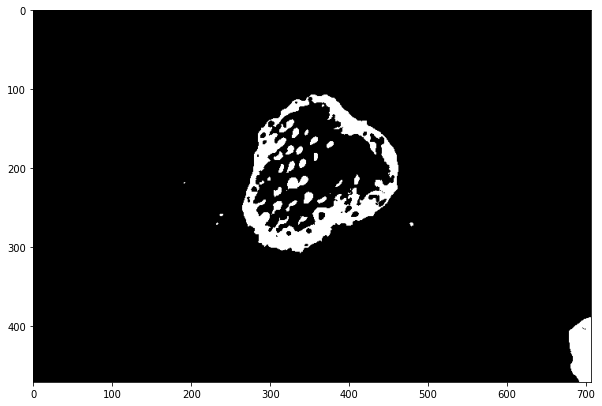

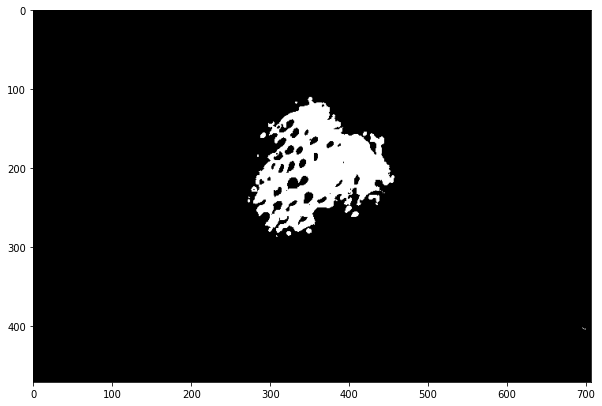

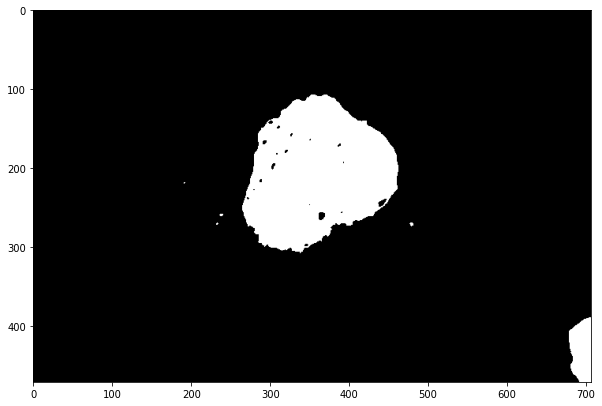

In [34]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [35]:
image_red

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

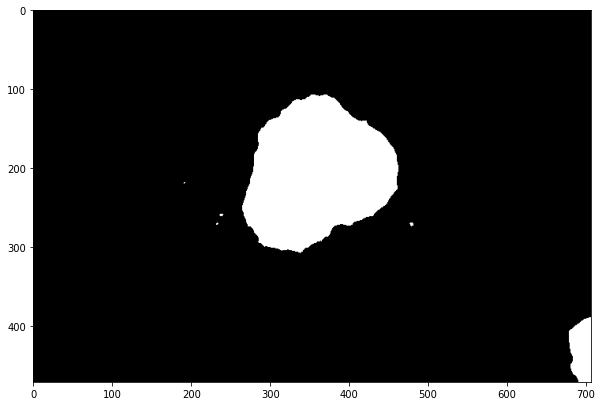

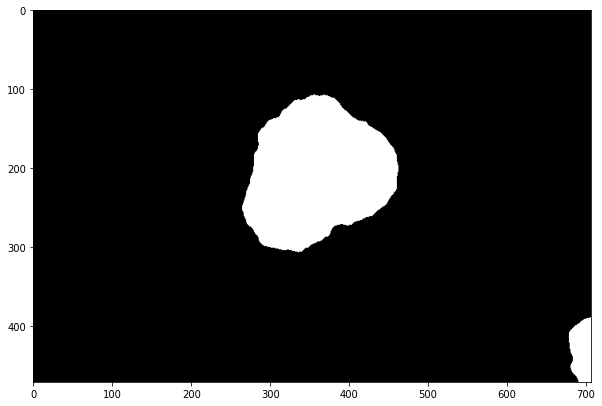

In [36]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

2


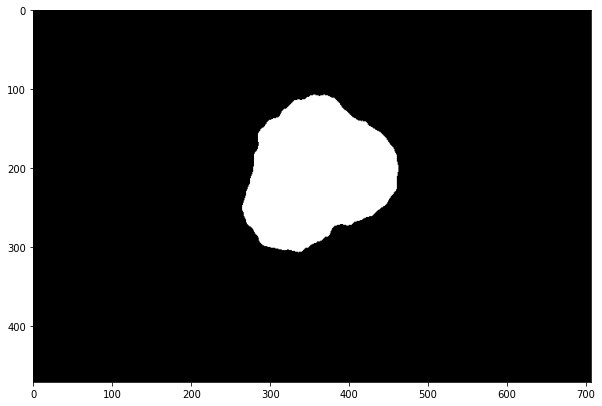

In [37]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    _, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

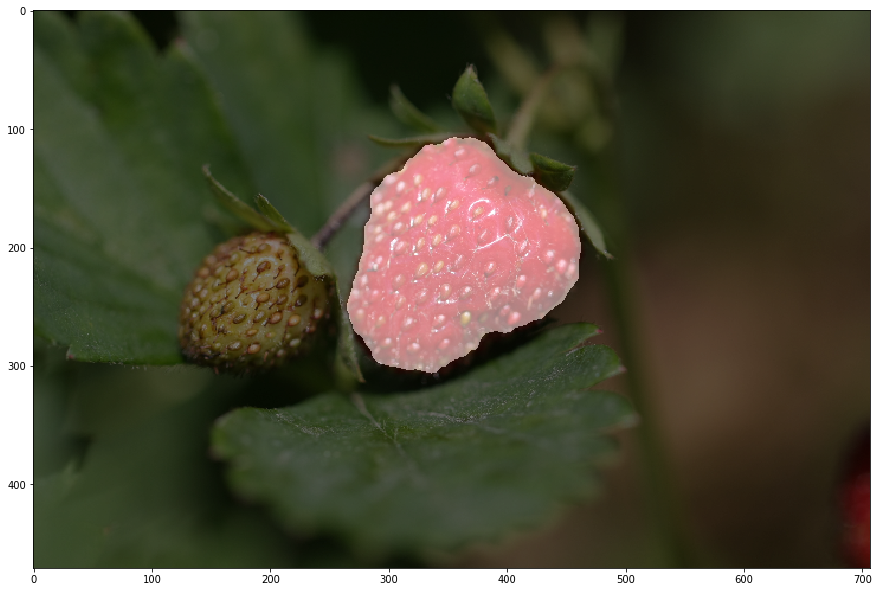

In [38]:
overlay_mask(red_mask, image)

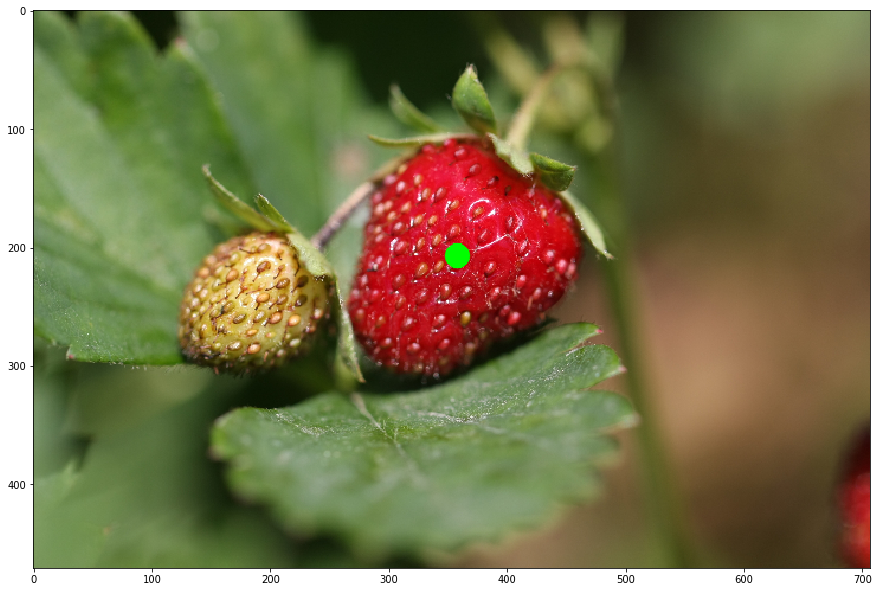

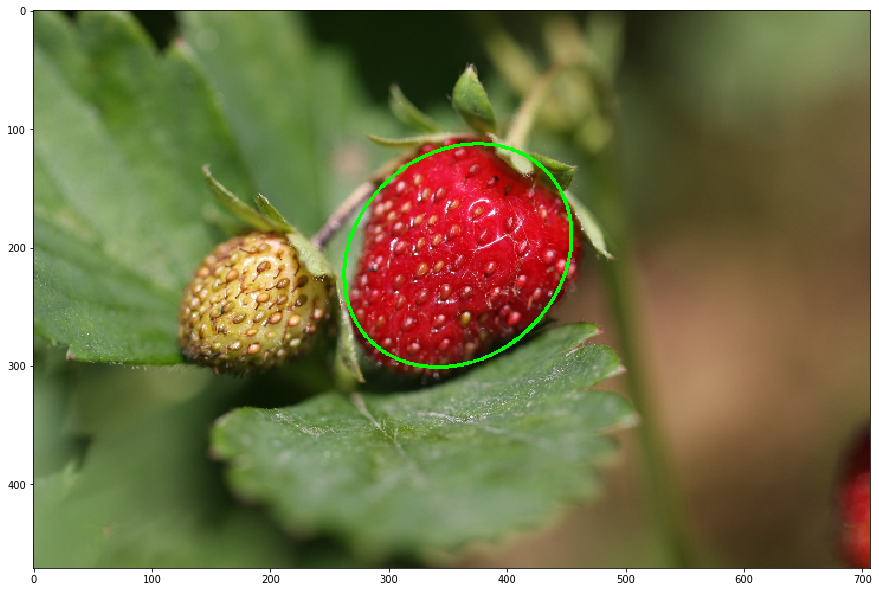

In [39]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)